<h1 style="color: green; text-align: center;">Final Assignment</h1>


*-By Tanya Singh (231086)*

<h1 style="color:blue; font-size:15px;font-style:bold">Objective- The objective is to build a machine learning model that predicts whether the wastewater treatment process is operating optimally based on daily measurements of the plant's operational data.</h1>

<h1 style="color:green">Importing necessary Libraries</h1>

In [214]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

<h1 style="color:green">Loading Data Set</h1>

In [3]:
data=pd.read_csv("dataset.csv")
data.head()

,serial No,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,2014,1,1
1,1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,2014,1,2
2,2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,2014,1,5
3,3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,2014,1,6
4,4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,2014,1,7


<h1 style="color:green">Data-Preprocessing</h1>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   serial No                 1382 non-null   int64  
 1   Average Outflow           1382 non-null   float64
 2   Average Inflow            1382 non-null   float64
 3   Energy Consumption        1382 non-null   int64  
 4   Ammonia                   1382 non-null   float64
 5   Biological Oxygen Demand  1382 non-null   float64
 6   Chemical Oxygen Demand    1382 non-null   float64
 7   Total Nitrogen            1382 non-null   float64
 8   Average Temperature       1382 non-null   float64
 9   Maximum temperature       1382 non-null   float64
 10  Minimum temperature       1382 non-null   float64
 11  Atmospheric pressure      1382 non-null   float64
 12  Average humidity          1382 non-null   int64  
 13  Total rainfall            1382 non-null   float64
 14  Average 

In [5]:
data.describe()

,serial No,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,690.500000,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259,2016.258321,6.184515,15.584660
std,399.093347,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362,1.583491,3.410588,8.741422
min,0.000000,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,345.250000,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000,2015.000000,3.000000,8.000000
50%,690.500000,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000,2016.000000,6.000000,15.000000
75%,1035.750000,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000,2018.000000,9.000000,23.000000
max,1381.000000,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000,2019.000000,12.000000,31.000000


In [6]:
data.shape

(1382, 20)

<p style="color: red;">Checking For Null Values
</p>


In [7]:
data.isna().sum()

#Output: No Null Values

serial No                   0
Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
dtype: int64

<p style="color: red;">Correlation Analysis</p>


In [8]:
data.corr()

,serial No,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
serial No,1.000000,0.308471,0.378175,0.232384,0.121004,-0.241955,0.228638,0.095041,-0.034638,-0.045970,0.047995,0.027521,-0.075676,-0.207726,-0.039775,-0.022567,0.000486,0.983282,0.052026,0.017682
Average Outflow,0.308471,1.000000,0.541923,0.167099,0.040590,-0.115811,-0.022723,-0.061951,-0.000163,0.006070,0.035516,-0.068941,-0.016560,-0.090001,-0.027635,-0.015406,-0.006319,0.308915,-0.012221,-0.061292
Average Inflow,0.378175,0.541923,1.000000,0.136211,-0.032709,-0.121364,0.018026,-0.035827,0.098149,0.093073,0.140905,-0.012452,-0.040534,-0.100358,-0.031872,-0.025010,-0.012203,0.388505,-0.066273,-0.055009
Energy Consumption,0.232384,0.167099,0.136211,1.000000,-0.133076,-0.136945,0.000346,-0.167448,-0.266053,-0.245119,-0.222896,-0.004160,0.155245,-0.014242,0.007085,0.020656,0.017388,0.179876,0.272076,0.023010
Ammonia,0.121004,0.040590,-0.032709,-0.133076,1.000000,0.164753,0.284552,0.342995,0.110000,0.099279,0.094802,-0.032908,-0.076970,-0.074313,-0.028647,-0.047966,-0.048622,0.140567,-0.112396,-0.029223
Biological Oxygen Demand,-0.241955,-0.115811,-0.121364,-0.136945,0.164753,1.000000,0.524189,0.455843,0.150706,0.137368,0.133025,-0.011270,-0.087240,0.001186,-0.019039,0.001384,0.000370,-0.228753,-0.065866,-0.000713
Chemical Oxygen Demand,0.228638,-0.022723,0.018026,0.000346,0.284552,0.524189,1.000000,0.681225,0.083946,0.090018,0.052716,0.002585,-0.152655,-0.055335,-0.050351,-0.029496,-0.006580,0.231927,-0.034368,0.005837
Total Nitrogen,0.095041,-0.061951,-0.035827,-0.167448,0.342995,0.455843,0.681225,1.000000,0.269751,0.259386,0.232274,0.006595,-0.210108,-0.012618,-0.053080,-0.029228,0.006540,0.120105,-0.142140,-0.007392
Average Temperature,-0.034638,-0.000163,0.098149,-0.266053,0.110000,0.150706,0.083946,0.269751,1.000000,0.924944,0.890901,0.013499,-0.553688,-0.004256,-0.122247,0.098620,0.219791,0.015400,-0.272413,-0.009542
Maximum temperature,-0.045970,0.006070,0.093073,-0.245119,0.099279,0.137368,0.090018,0.259386,0.924944,1.000000,0.759461,0.018942,-0.533249,-0.003110,-0.120905,0.035349,0.199370,-0.004957,-0.223353,0.006459


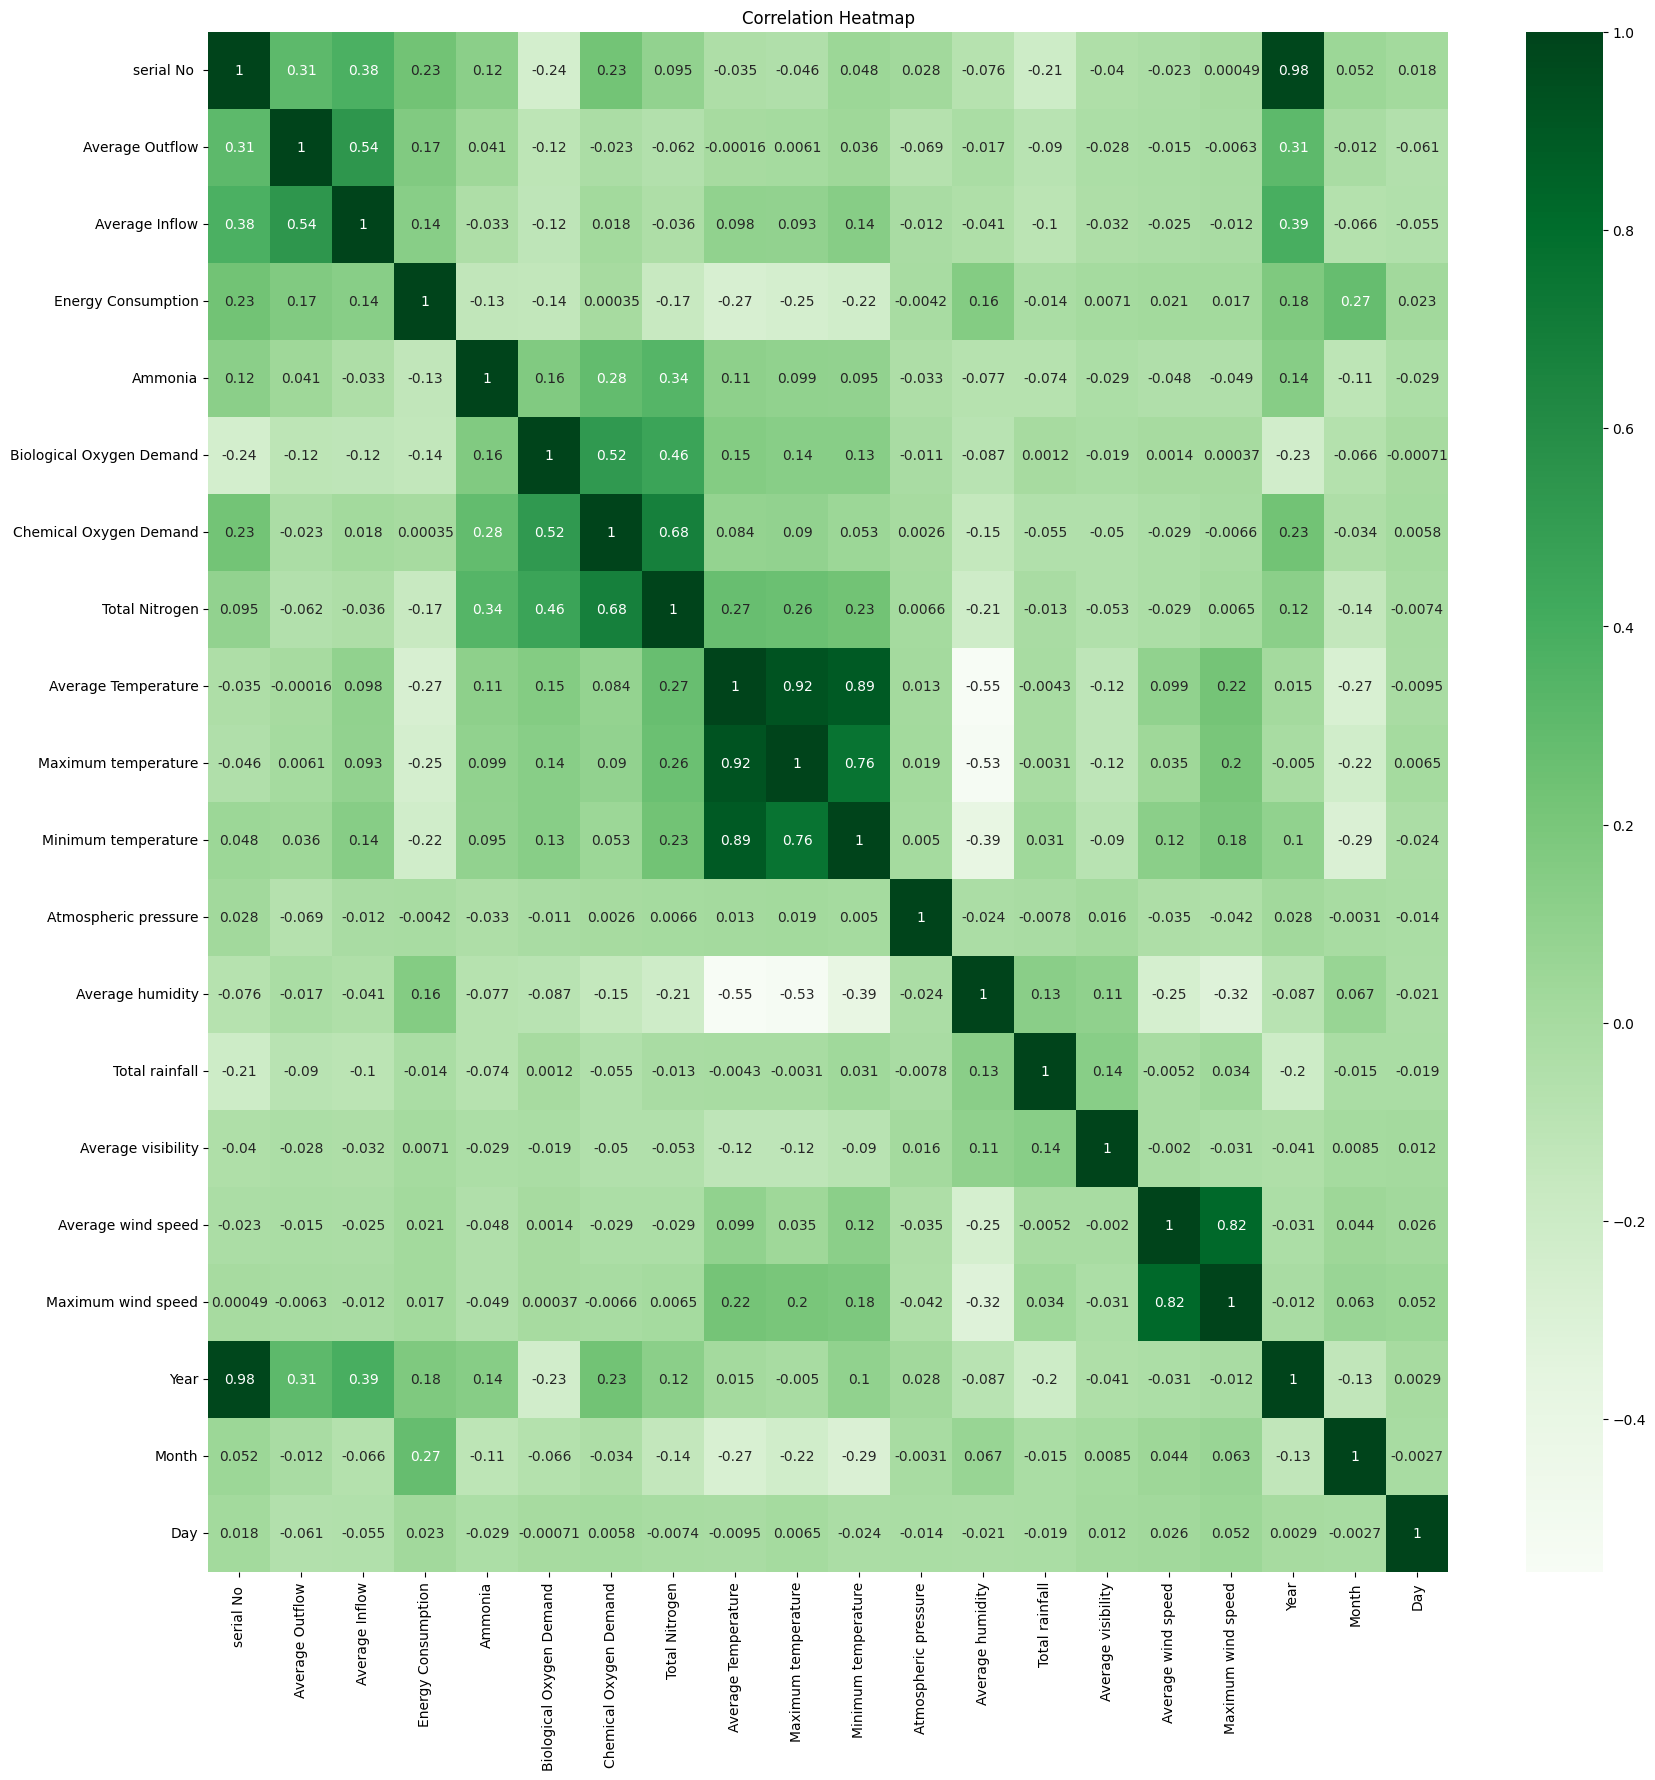

In [9]:
plt.figure(figsize=(20, 20))
sns.heatmap(data=data.corr(),annot=True,
            cmap="Greens")
plt.title("Correlation Heatmap")
plt.show()

*Conclusion:*


Only Average Inflow feature seems to have a significative correlation with the Average Outflow.

It doesn't mean that the other features are not usefull. To determine this, we need to explore in detail these features

<p style="color: red;">Analysising Coloumns
</p>


In [10]:
data["Average Inflow"].nunique()

1093

In [11]:
data["Average Outflow"].nunique()

1052

In [12]:
data["Energy Consumption"].nunique()

1379

In [13]:
data["Ammonia"].nunique()

48

In [14]:
data["Biological Oxygen Demand"].nunique()

214

In [15]:
data["Chemical Oxygen Demand"].nunique()

221

In [16]:
data["Total Nitrogen"].nunique()

355

In [17]:
data["Average Temperature"].nunique()

230

In [18]:
data["Maximum temperature"].nunique()

195

In [19]:
data["Minimum temperature"].nunique()


162

In [20]:
data["Atmospheric pressure"].nunique()

6

In [21]:
data["Average humidity"].nunique()

77

In [22]:
data["Total rainfall"].nunique()

32

In [23]:
data["Average visibility"].nunique()

56

In [24]:
data["Average wind speed"].nunique()

198

In [25]:
data["Maximum wind speed"].nunique()

49

<p style="color: red;">Distribution of Coloumns</p>


C:\Users\tanya\AppData\Local\Temp\ipykernel_17808\2904255493.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Average Inflow"])
C:\Users\tanya\AppData\Local\Temp\ipykernel_17808\2904255493.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Average Outflow"])
C:\Users\tanya\AppDat

<Axes: xlabel='Energy Consumption', ylabel='Density'>

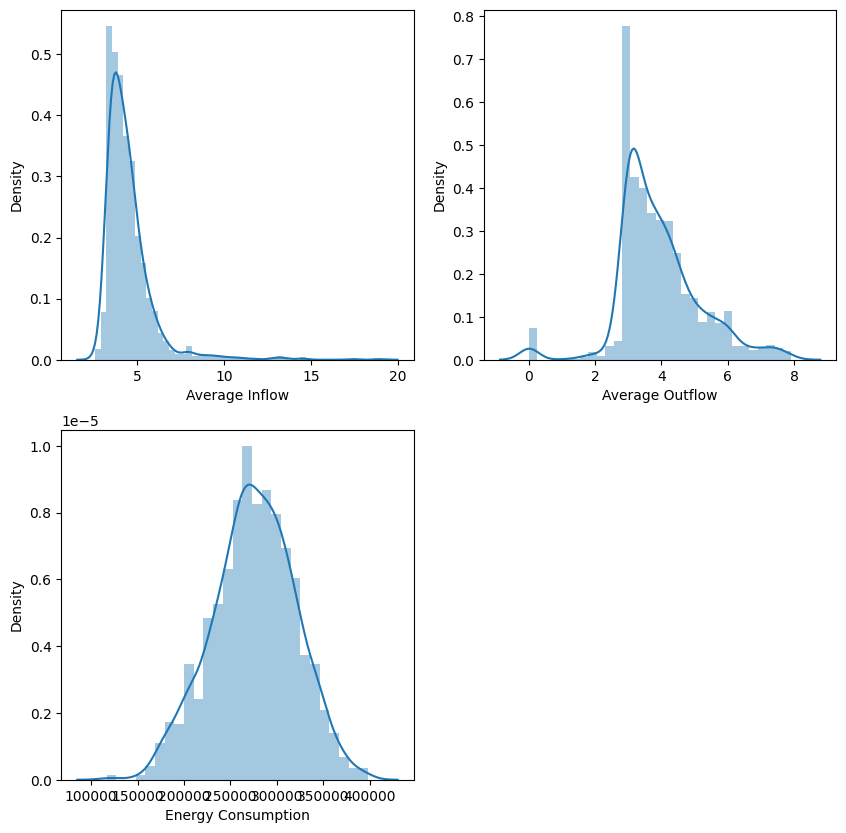

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(data["Average Inflow"])
plt.subplot(2,2,2)
sns.distplot(data["Average Outflow"])
plt.subplot(2,2,3)
sns.distplot(data["Energy Consumption"])



C:\Users\tanya\AppData\Local\Temp\ipykernel_17808\2891773191.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Biological Oxygen Demand"])
C:\Users\tanya\AppData\Local\Temp\ipykernel_17808\2891773191.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Chemical Oxygen Demand"])
C:\U

<Axes: xlabel='Ammonia', ylabel='Density'>

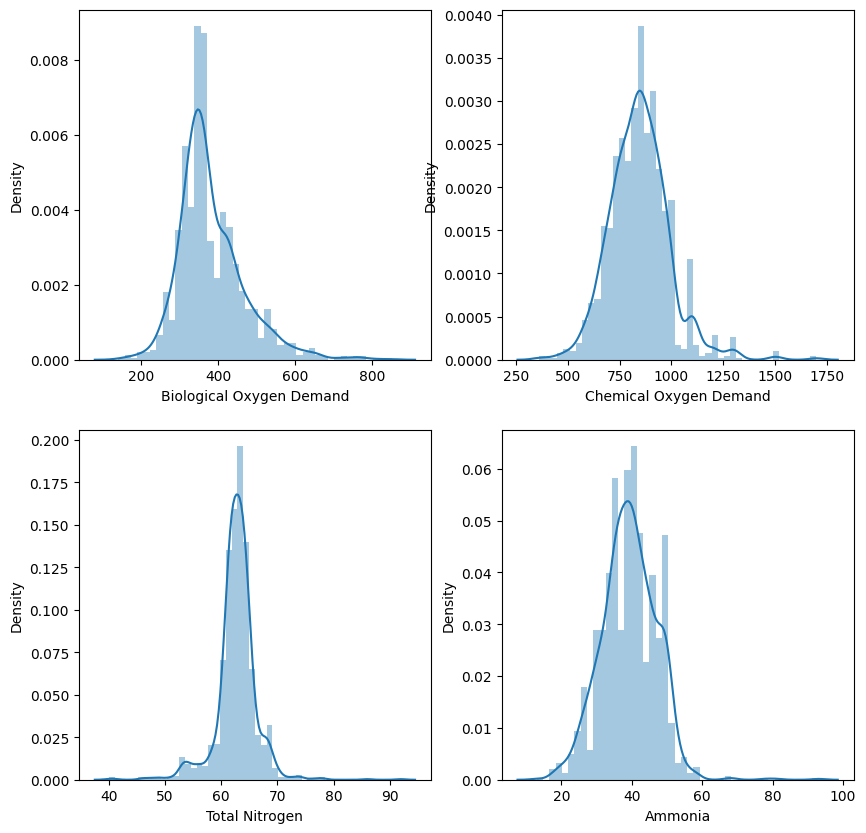

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(data["Biological Oxygen Demand"])
plt.subplot(2,2,2)
sns.distplot(data["Chemical Oxygen Demand"])
plt.subplot(2,2,3)
sns.distplot(data["Total Nitrogen"])
plt.subplot(2,2,4)
sns.distplot(data["Ammonia"])

C:\Users\tanya\AppData\Local\Temp\ipykernel_17808\3065315736.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Average Temperature"])
C:\Users\tanya\AppData\Local\Temp\ipykernel_17808\3065315736.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Maximum temperature"])
C:\Users\tan

<Axes: xlabel='Minimum temperature', ylabel='Density'>

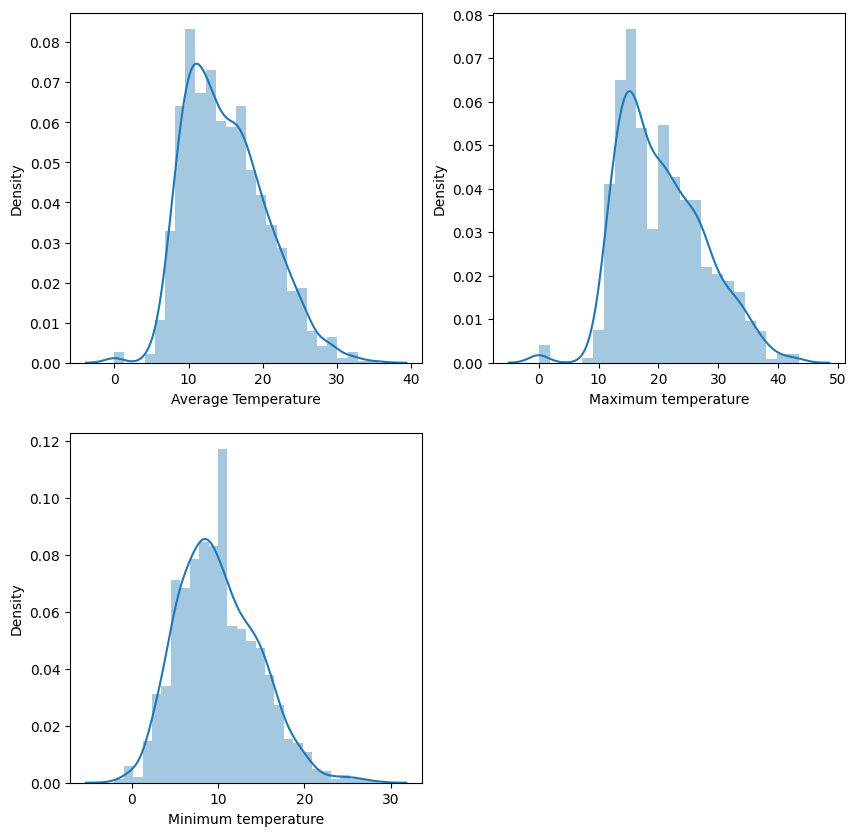

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(data["Average Temperature"])
plt.subplot(2,2,2)
sns.distplot(data["Maximum temperature"])
plt.subplot(2,2,3)
sns.distplot(data["Minimum temperature"])



C:\Users\tanya\AppData\Local\Temp\ipykernel_17808\2411977386.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Atmospheric pressure"])
C:\Users\tanya\AppData\Local\Temp\ipykernel_17808\2411977386.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Average humidity"])
C:\Users\tanya

<Axes: xlabel='Average visibility', ylabel='Density'>

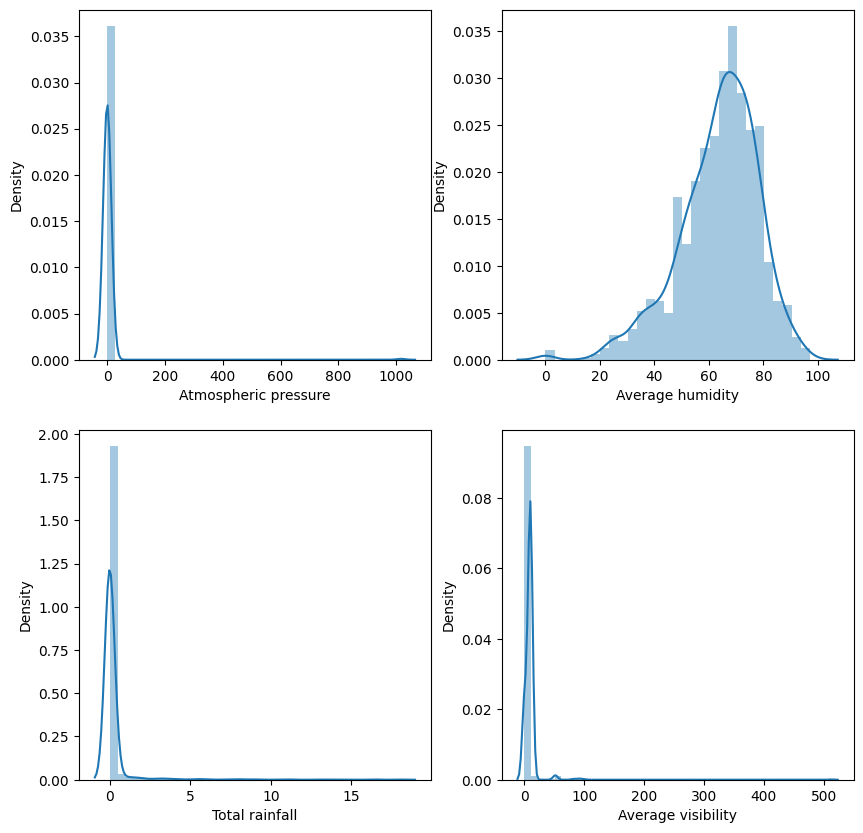

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(data["Atmospheric pressure"])
plt.subplot(2,2,2)
sns.distplot(data["Average humidity"])
plt.subplot(2,2,3)
sns.distplot(data["Total rainfall"])
plt.subplot(2,2,4)
sns.distplot(data["Average visibility"])


C:\Users\tanya\AppData\Local\Temp\ipykernel_17808\2699373786.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Average wind speed"])
C:\Users\tanya\AppData\Local\Temp\ipykernel_17808\2699373786.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Maximum wind speed"])


<Axes: xlabel='Maximum wind speed', ylabel='Density'>

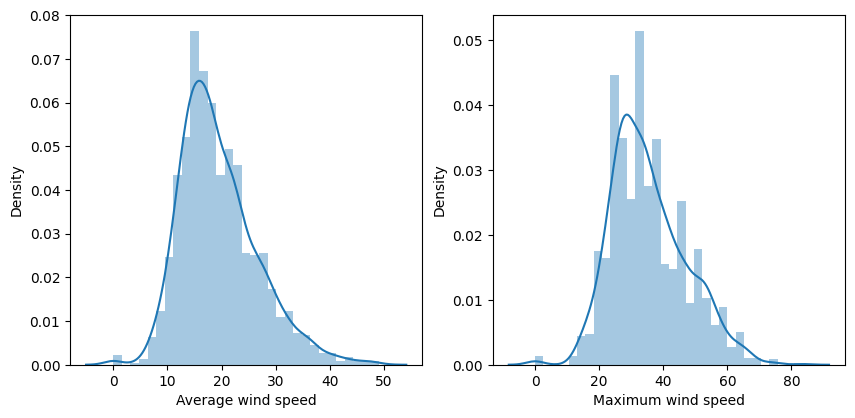

In [30]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.distplot(data["Average wind speed"])
plt.subplot(2,2,2)
sns.distplot(data["Maximum wind speed"])

<p style="color: red;">Analysising Outliers
</p>


<Axes: ylabel='Energy Consumption'>

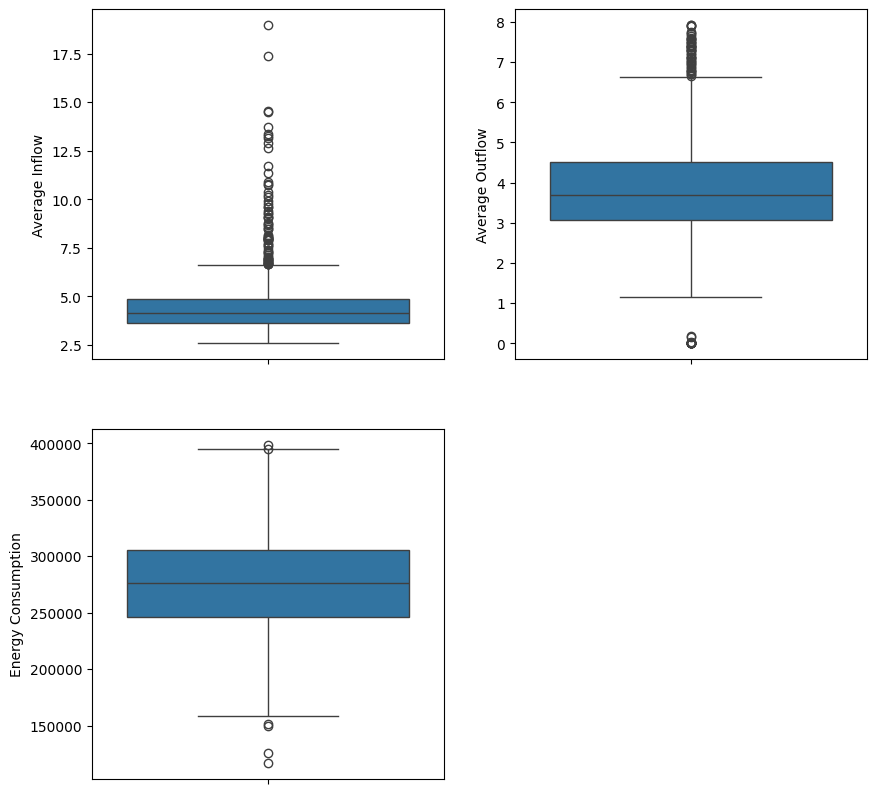

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data["Average Inflow"])
plt.subplot(2,2,2)
sns.boxplot(data["Average Outflow"])
plt.subplot(2,2,3)
sns.boxplot(data["Energy Consumption"])



<Axes: ylabel='Ammonia'>

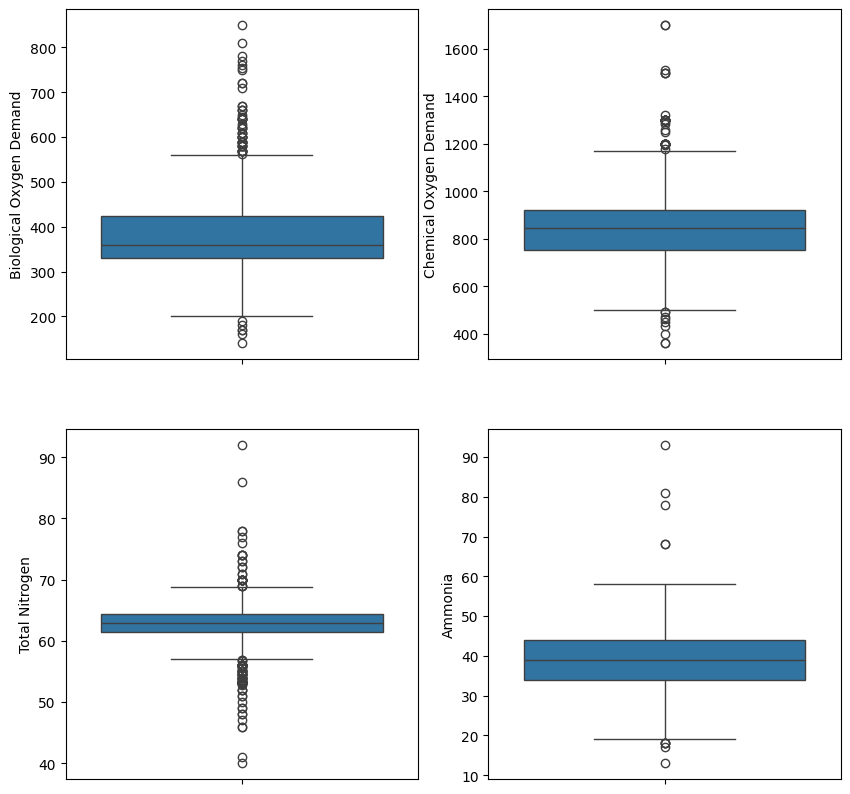

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data["Biological Oxygen Demand"])
plt.subplot(2,2,2)
sns.boxplot(data["Chemical Oxygen Demand"])
plt.subplot(2,2,3)
sns.boxplot(data["Total Nitrogen"])
plt.subplot(2,2,4)
sns.boxplot(data["Ammonia"])

<Axes: ylabel='Minimum temperature'>

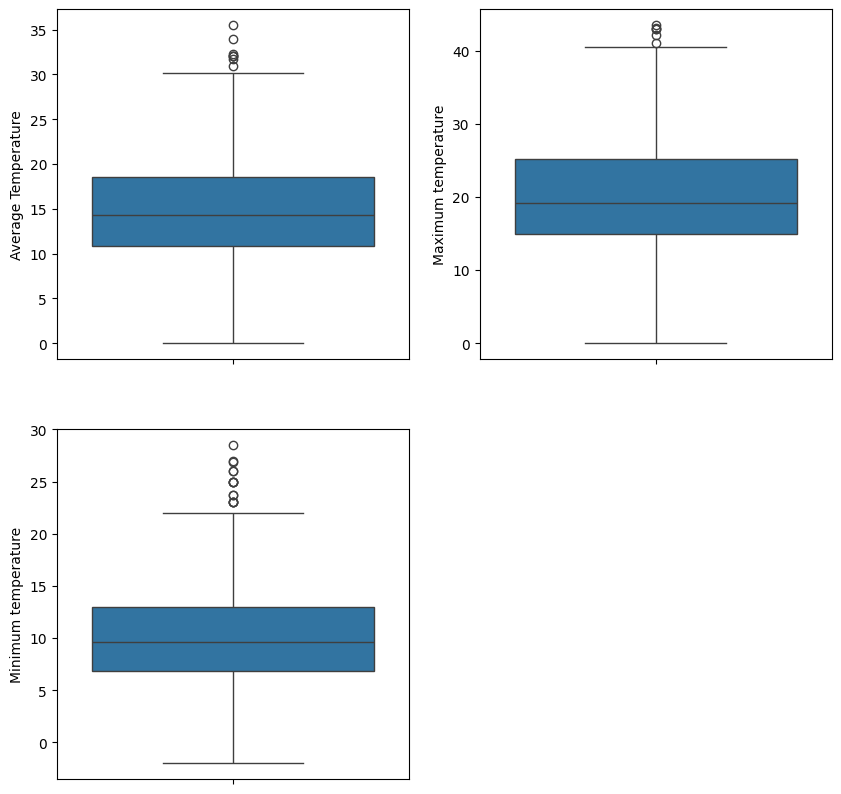

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data["Average Temperature"])
plt.subplot(2,2,2)
sns.boxplot(data["Maximum temperature"])
plt.subplot(2,2,3)
sns.boxplot(data["Minimum temperature"])



<Axes: ylabel='Average visibility'>

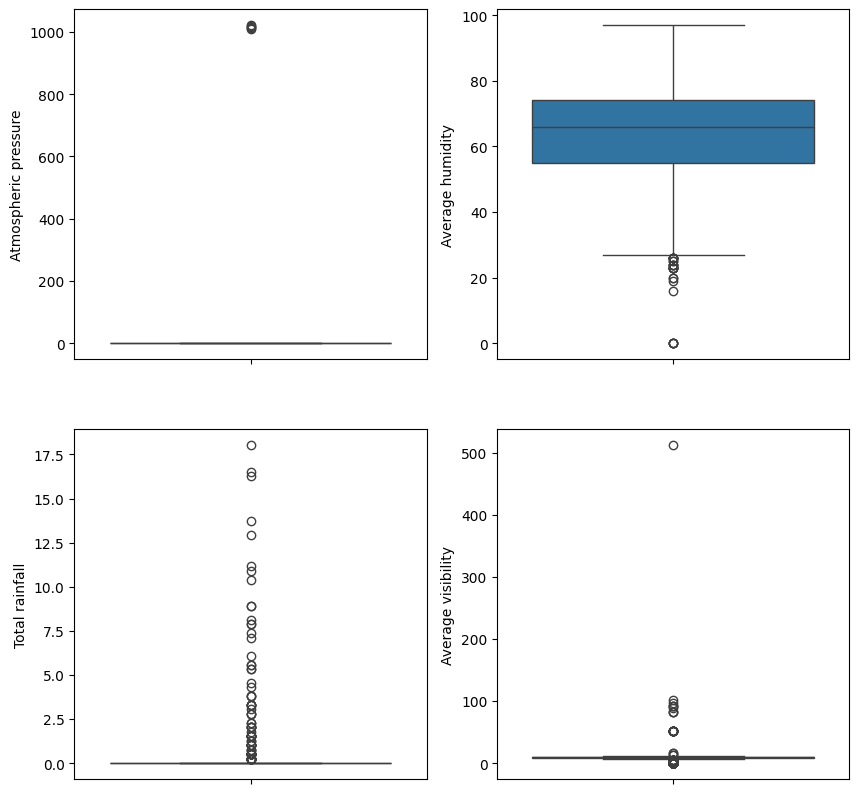

In [34]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data["Atmospheric pressure"])
plt.subplot(2,2,2)
sns.boxplot(data["Average humidity"])
plt.subplot(2,2,3)
sns.boxplot(data["Total rainfall"])
plt.subplot(2,2,4)
sns.boxplot(data["Average visibility"])


<Axes: ylabel='Maximum wind speed'>

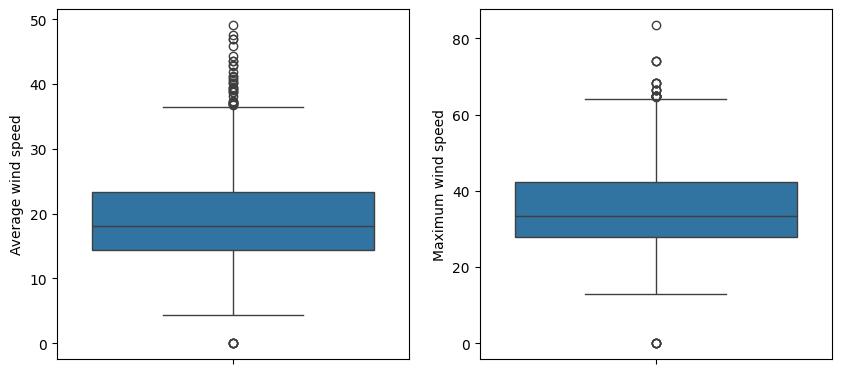

In [35]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.boxplot(data["Average wind speed"])
plt.subplot(2,2,2)
sns.boxplot(data["Maximum wind speed"])

<h1 style="color:green">Relevant features Selection </h1>

** Average Outflow

**Average Inflow

**Energy Consumption

**Ammonia

**Biological Oxygen Demand

**Chemical Oxygen Demand

**Total Nitrogen

**Average Temperature

**Average humidity

**Average wind speed

**Year

<h1 style="color:green">Scaling Data For Optimised Model</h1>

In [36]:
#Removing All Outliers

In [37]:

for column in data.columns:
    data[column] = data[column].astype(float)

    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    IQR = q3 - q1

    min_val = q1 - 1.5 * IQR
    max_val = q3 + 1.5 * IQR

    mean_value = data[column].mean()

    outlier_condition = (data[column] < min_val) | (data[column] > max_val)
    data.loc[outlier_condition, column] = mean_value


<h1 style="color:green">Visualisizing Key Trends </h1>

<p style="color: red;">Line Plot Between "Average Inflow" and "Average Outflow"
</p>


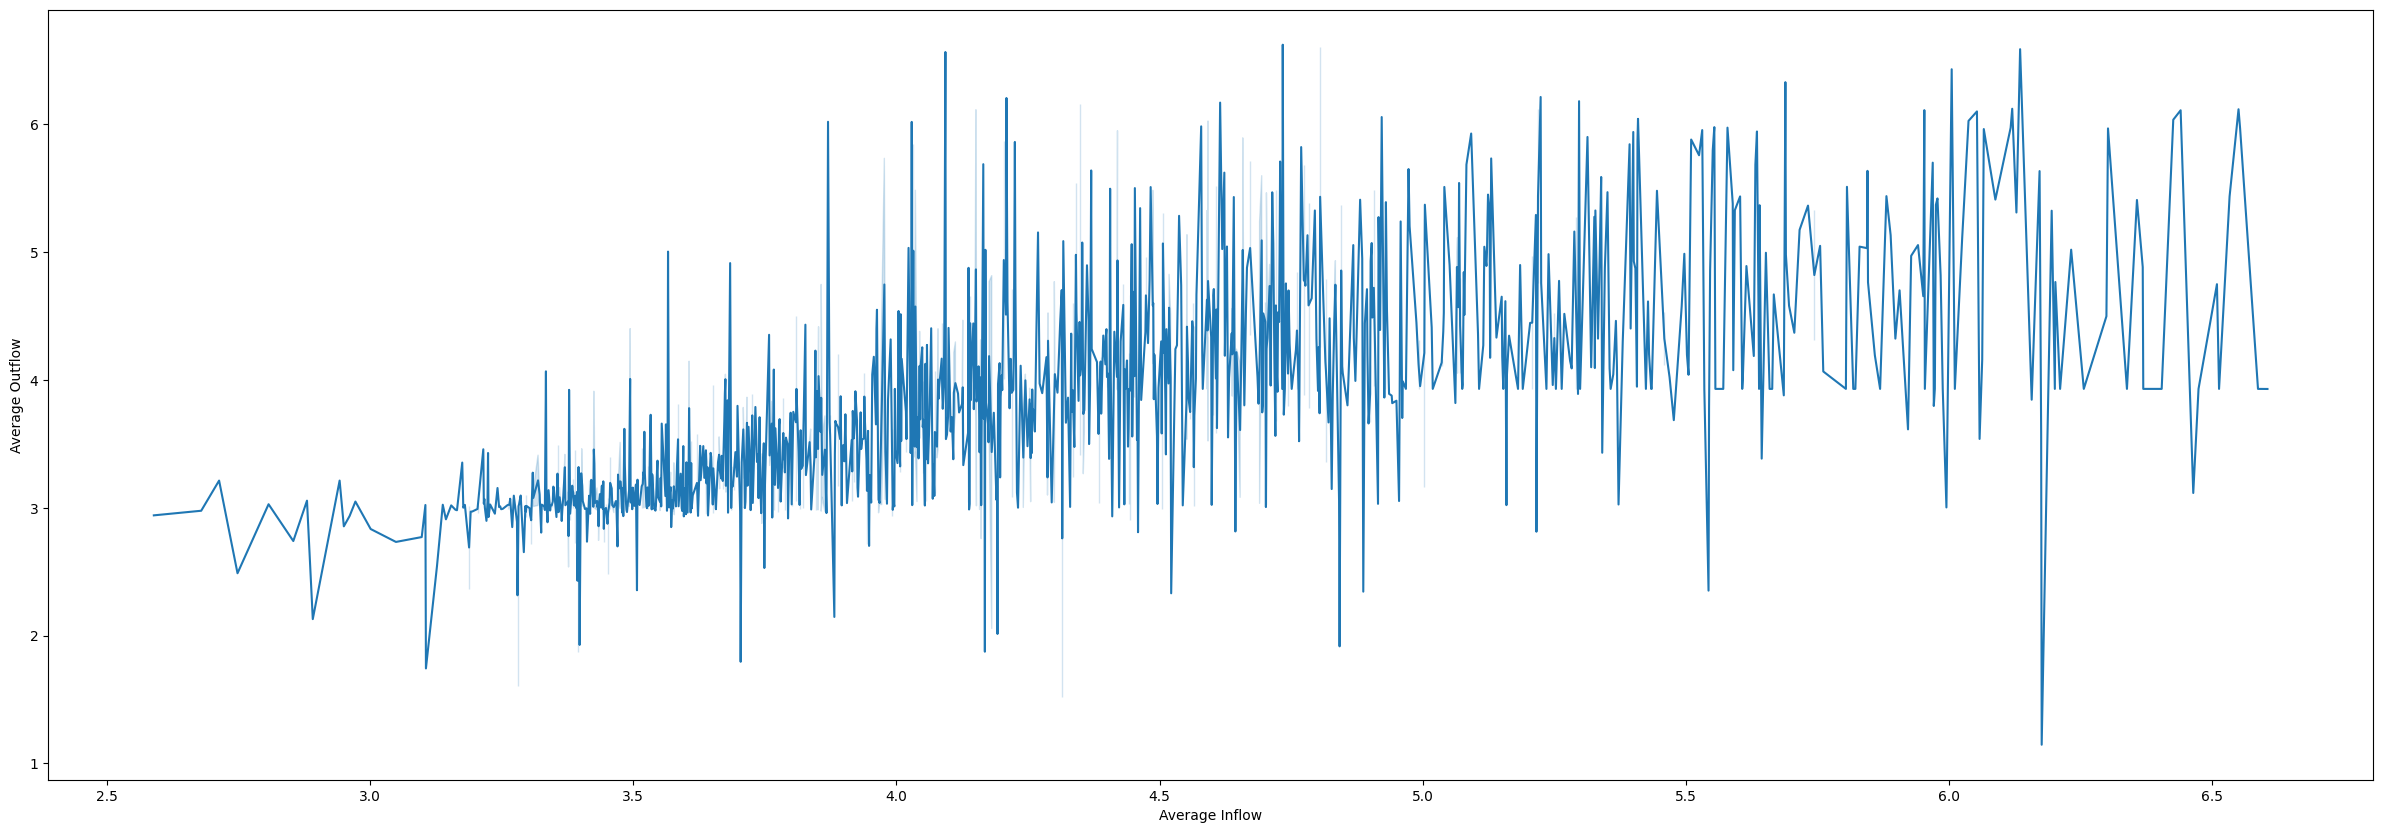

In [38]:

plt.figure(figsize=(30, 10))

sns.lineplot(data=data, y="Average Outflow", x="Average Inflow")

plt.show()

<p style="color: red;">Average Inflow in Each Year
</p>


<Axes: ylabel='Average Inflow'>

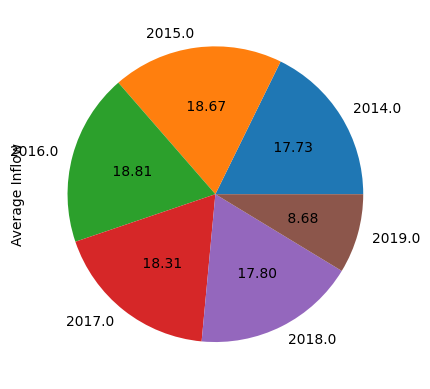

In [39]:
data.groupby("Year").count()["Average Inflow"].plot(kind="pie",autopct="% .2f")



<p style="color: red;">Average Outflow in Each Year
</p>


<Axes: ylabel='Average Outflow'>

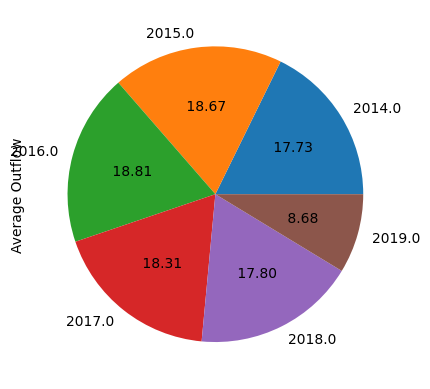

In [40]:
data.groupby("Year").count()["Average Outflow"].plot(kind="pie",autopct="% .2f")


<p style="color: red;">Average Inflow in Each Month
</p>


<Axes: ylabel='Average Inflow'>

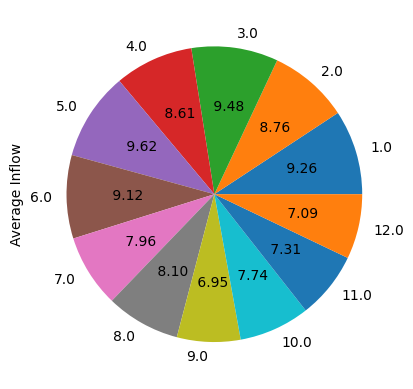

In [41]:
data.groupby("Month").count()["Average Inflow"].plot(kind="pie",autopct="% .2f")


<p style="color: red;">Average Outflow in Each Month
</p>


<Axes: ylabel='Average Outflow'>

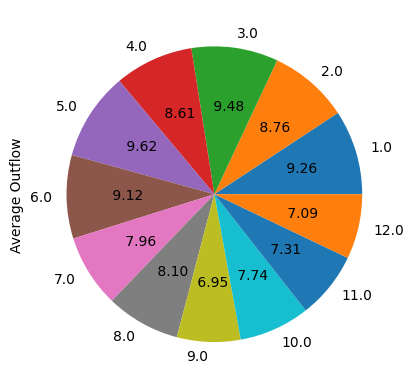

In [42]:
data.groupby("Month").count()["Average Outflow"].plot(kind="pie",autopct="% .2f")


<Axes: xlabel='Energy Consumption'>

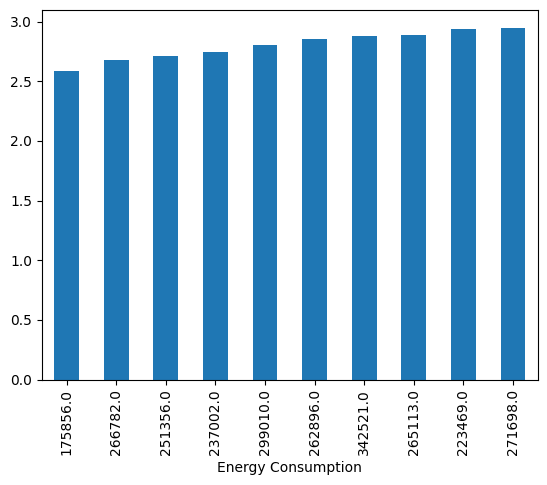

In [43]:
data.groupby('Energy Consumption').mean()['Average Inflow'].sort_values().head(10).plot(kind="bar")

<Axes: ylabel='Average Inflow'>

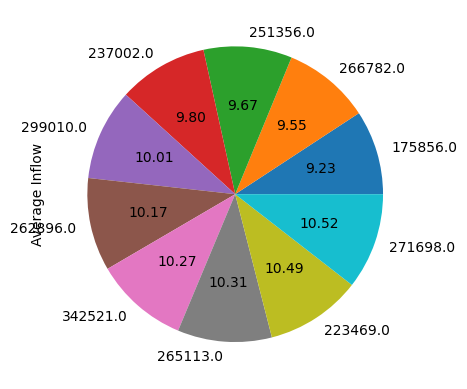

In [44]:
data.groupby('Energy Consumption').mean()['Average Inflow'].sort_values().head(10).plot(kind="pie",autopct="%.2f")

<Axes: xlabel='Energy Consumption'>

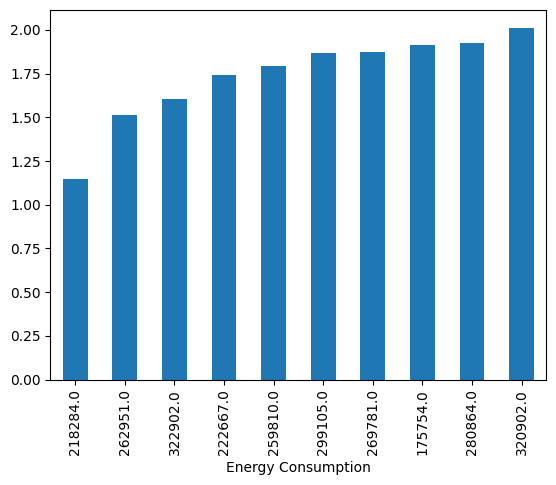

In [45]:
data.groupby('Energy Consumption').mean()['Average Outflow'].sort_values().head(10).plot(kind="bar")

<Axes: ylabel='Average Outflow'>

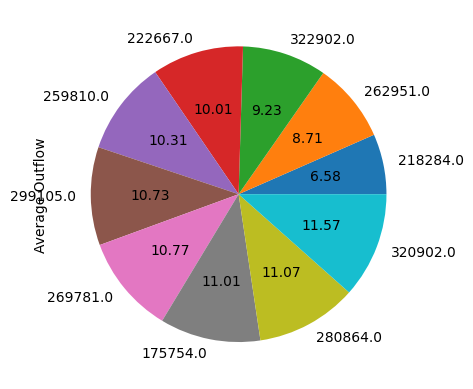

In [46]:
data.groupby('Energy Consumption').mean()['Average Outflow'].sort_values().head(10).plot(kind="pie",autopct="%.2f")

<p style="color: red;">Plot B/W Energy Consumption And Ammonia
</p>


C:\Users\tanya\AppData\Local\Temp\ipykernel_17808\2859642569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ammonia", y="Energy Consumption", data=top_10_amm, palette="viridis")


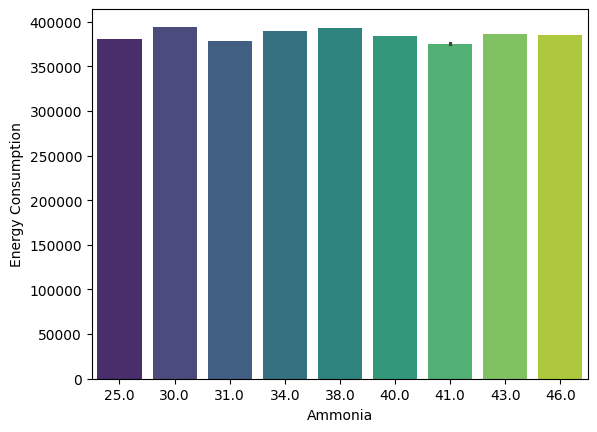

In [47]:
top_10_amm = data.sort_values(by="Energy Consumption", ascending=False).head(10)
sns.barplot(x="Ammonia", y="Energy Consumption", data=top_10_amm, palette="viridis")

plt.show()

<p style="color: red;">Plot B/W Energy Consumption And Biological Oxygen Demand
</p>


C:\Users\tanya\AppData\Local\Temp\ipykernel_17808\3864795212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Biological Oxygen Demand", y="Energy Consumption", data=top_10_amm, palette="viridis")


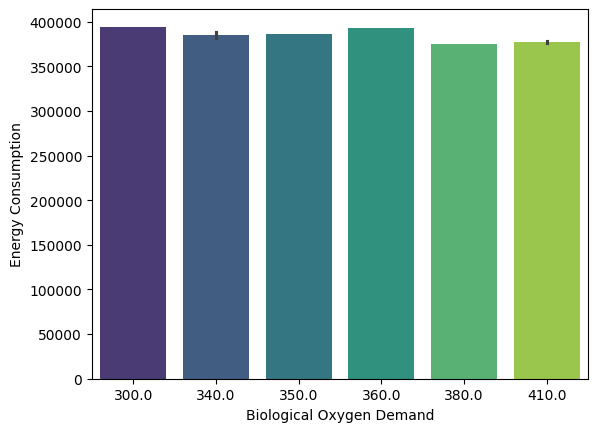

In [48]:
top_10_amm = data.sort_values(by="Energy Consumption", ascending=False).head(10)
sns.barplot(x="Biological Oxygen Demand", y="Energy Consumption", data=top_10_amm, palette="viridis")

plt.show()

<p style="color: red;">Plot B/W Energy Consumption And Chemical Oxygen Demand
</p>


C:\Users\tanya\AppData\Local\Temp\ipykernel_17808\3694967682.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Chemical Oxygen Demand", y="Energy Consumption", data=top_10_amm, palette="viridis")


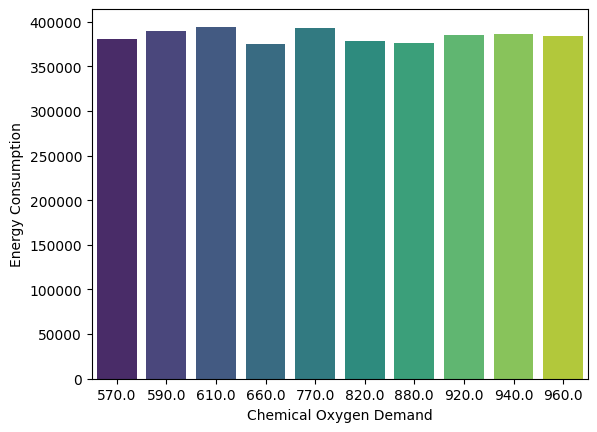

In [49]:
top_10_amm = data.sort_values(by="Energy Consumption", ascending=False).head(10)
sns.barplot(x="Chemical Oxygen Demand", y="Energy Consumption", data=top_10_amm, palette="viridis")

plt.show()

<p style="color: red;">Plot B/W Energy Consumption And Total Nitrogen
</p>


C:\Users\tanya\AppData\Local\Temp\ipykernel_17808\3351986417.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total Nitrogen", y="Energy Consumption", data=top_10_amm, palette="viridis")


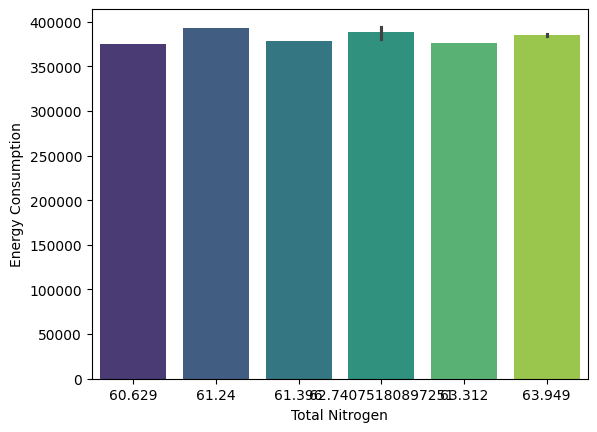

In [50]:
top_10_amm = data.sort_values(by="Energy Consumption", ascending=False).head(10)
sns.barplot(x="Total Nitrogen", y="Energy Consumption", data=top_10_amm, palette="viridis")

plt.show()


<h1 style="color:green">Modeling with Machine Learning Algorithms:
 </h1>

Apply various machine learning algorithms to classify the operational state of the wastewater treatment process. Use the following algorithms:

o	Logistic Regression from scratch as well as from sklearn

o	K-Nearest Neighbours (KNN)

o	Decision Tree Classifier

o	Random Forest Classifier

o	Support Vector Machine (SVM)

o	Any other relevant algorithms you feel might improve performance.


<h2 style="color:blue">Splitting and Scaling The DataSet
 </h2
     >


In [51]:
data.shape

(1382, 20)

In [52]:
data.head()

,serial No,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0.0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,0.21809,10.0,26.9,53.5,2014.0,1.0,1.0
1,1.0,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00000,10.0,14.4,27.8,2014.0,1.0,2.0
2,2.0,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.21809,10.0,31.9,61.1,2014.0,1.0,5.0
3,3.0,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00000,10.0,27.0,38.9,2014.0,1.0,6.0
4,4.0,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00000,10.0,20.6,35.2,2014.0,1.0,7.0


In [125]:
X = data.drop(columns=['Chemical Oxygen Demand']).values ; 
y = data['Chemical Oxygen Demand'].values;
y = (y <= 800).astype(int)   ; 
scaler = StandardScaler() ; 
x = scaler.fit_transform(X) ; 
x_train, x_test,  y_train, y_test = train_test_split(x, y,test_size=0.2 ,random_state=42) ;

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=43)
print('x_train : ') 
print(x_train[:5]) 
print("shape:", x_train.shape) 
print('*****************************************************************************') 
print('x_test : ') 
print(x_test[:5]) 
print("shape:" ,x_test.shape) 
print('*****************************************************************************') 

print('y_train : ') 
print(y_train[:5]) 
print("shape:", y_train.shape) 
print('*****************************************************************************') 

print('y_test : ') 
print(y_test[:5]) 
print("shape:", y_test.shape)

x_train : 
[[ 1.25203995 -0.97638841 -1.43267233  0.70696018 -0.02485764 -0.34955446
   0.1335327  -0.10239401 -0.30752993 -0.19981666 -0.06025846 -0.79987803
  -0.29261666  0.64474782  1.49070544  1.08122661  1.10029632  0.82581175
  -1.21130086]
 [-0.41484006  0.33553446  0.56507712 -0.66352239  1.49478646 -0.34955446
   1.41006428  1.63849951  1.66576999  1.62540305 -0.06025846 -0.79987803
  -0.29261666 -1.08085573 -0.12214988 -0.67578041 -0.1631931  -1.22736297
  -1.5546187 ]
 [ 0.32961612 -0.78818471 -0.10694069 -0.57394628  0.9421886   2.19805333
   2.74928268  0.66283391  0.52788171  0.48464073 -0.06025846 -0.87658506
  -0.29261666  0.64474782 -0.71890635 -0.67578041  0.46855161 -0.9340523
   1.42080258]
 [-0.6680053  -0.96428174 -1.3411524  -0.26337916  1.21848753 -0.49941375
  -0.66429954 -0.88675264 -1.07092333 -0.19981666 -0.06025846  0.96438382
  -0.29261666 -1.25341609 -0.33182107 -0.30934579 -0.79493781  0.82581175
  -0.86798302]
 [ 1.427501   -0.95107446  0.56246227  1.2

In [58]:
x_train.shape

(967, 10)

In [59]:
y_train.shape

(967, 1)

<h1 style="color:green">Multivariate Regression from scratch 
 </h1>


<h2 style="color:blue">Forward Propagation
 </h2


In [128]:
def forward_propagation(train_input, parameters):
    print("Forward Propagation:")
    print("train_input shape:", train_input.shape)
    print("parameters['m'] shape:", parameters['m'].shape)
    print("parameters['c'] value:", parameters['c'])  # Changed this line
    predictions = np.dot(train_input, parameters['m']) + parameters['c']
    print("predictions shape:", predictions.shape)
    return predictions


<h2 style="color:blue">
Defining Cost Function

 </h2


In [129]:
def cost_function(predictions, train_output):
    # Convert to NumPy arrays if inputs are pandas DataFrames
    if isinstance(predictions, pd.DataFrame):
        predictions = predictions.to_numpy()
    if isinstance(train_output, pd.DataFrame):
        train_output = train_output.to_numpy()

    # Ensure they are column vectors
    predictions = predictions.reshape(-1, 1)
    train_output = train_output.reshape(-1, 1)

    # Compute cost
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost


<h2 style="color:blue">
Gradient Descent for Backpropagation
 </h2


In [130]:


def backward_propagation(train_input, train_output, predictions):
    # Convert to NumPy arrays if needed
    if isinstance(train_output, pd.DataFrame):
        train_output = train_output.to_numpy()
    if isinstance(predictions, pd.DataFrame):
        predictions = predictions.to_numpy()

    # Ensure shapes are compatible
    train_output = train_output.reshape(-1, 1)
    predictions = predictions.reshape(-1, 1)

    # Compute gradients
    df = (train_output - predictions) * -1
    dm = np.dot(train_input.T, df) / len(train_input)  # Gradient with respect to weights
    dc = np.mean(df)  # Gradient with respect to bias

    # Store gradients in a dictionary
    derivatives = {
        'dm': dm,
        'dc': dc
    }
    return derivatives


<h2 style="color:blue">
Update the Parameters
 </h2


In [131]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

<h2 style="color:blue">
Train the Data
 </h2


In [134]:

def train(train_input, train_output, learning_rate, iters):
    # Initialize parameters
    parameters = {
        "m": np.random.uniform(0, 1, train_input.shape[1]).reshape(-1, 1) * -1,
        "c": np.random.uniform(0, 1) * -1
    }
    
    loss = []
    
    for i in range(iters):
        # Forward propagation
        print(f"Iteration {i+1}")
        print("Before forward propagation:")
        print("train_input shape:", train_input.shape)
        print("train_output shape:", train_output.shape)
        predictions = forward_propagation(train_input, parameters)

        # Cost function
        cost = cost_function(predictions, train_output)
        loss.append(cost)
        print(f"Loss: {cost}")

         
        #plot function
        #fig, ax = plt.subplots()
        
        #ax.plot(train_input, train_output, '+', label='Original')
        #ax.plot(train_input, predictions, '*', label='Training')

        #legend = ax.legend()
        
        #plt.plot(train_input, train_output, '+')
        #plt.plot(train_input, predictions, '*')        
        
        #plt.show()
        
        
        # Back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        # Update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
    
    return parameters, loss


<h2 style="color:blue">
    Training
 </h2


In [140]:
parameters, loss = train(x_train, y_train,  learning_rate=0.0001, iters=15)


Iteration 1
Before forward propagation:
train_input shape: (967, 19)
train_output shape: (967,)
Forward Propagation:
train_input shape: (967, 19)
parameters['m'] shape: (19, 1)
parameters['c'] value: -0.11519433016513347
predictions shape: (967, 1)
Loss: 2.7868409911570775
Iteration 2
Before forward propagation:
train_input shape: (967, 19)
train_output shape: (967,)
Forward Propagation:
train_input shape: (967, 19)
parameters['m'] shape: (19, 1)
parameters['c'] value: -0.1151506852457445
predictions shape: (967, 1)
Loss: 2.7854886570371002
Iteration 3
Before forward propagation:
train_input shape: (967, 19)
train_output shape: (967,)
Forward Propagation:
train_input shape: (967, 19)
parameters['m'] shape: (19, 1)
parameters['c'] value: -0.11510704364497797
predictions shape: (967, 1)
Loss: 2.7841371892275935
Iteration 4
Before forward propagation:
train_input shape: (967, 19)
train_output shape: (967,)
Forward Propagation:
train_input shape: (967, 19)
parameters['m'] shape: (19, 1)
pa

<h2 style="color:blue">
Predicting
 </h2


In [141]:
test_predictions = forward_propagation(x_test, parameters)

Forward Propagation:
train_input shape: (415, 19)
parameters['m'] shape: (19, 1)
parameters['c'] value: -0.11454000482164317
predictions shape: (415, 1)


<h2 style="color:blue">
Cost
 </h2


In [142]:
test_cost = cost_function(test_predictions, y_test)
print(f"Test Cost: {test_cost}")

Test Cost: 3.246941471769578


<h1 style="color:green"> Regression using Sklearn
 </h1>


<h2 style="color:blue">Training Model
 </h2
     >


In [143]:
lr_model=LinearRegression()

In [144]:

lr_model.fit(x_train,y_train)

LinearRegression()

In [145]:
lr_model.coef_

array([-2.50175419e+00,  2.39157937e-02,  1.71271083e-02, -1.84622791e-02,
       -5.10647463e-02, -1.20359826e-01, -2.22640794e-01, -7.04981240e-02,
        1.33478884e-02,  5.53755410e-02, -4.16438940e-03, -2.30835466e-02,
        1.27449797e-04, -1.35861569e-02,  9.19084714e-03, -6.14437588e-03,
        2.38896377e+00,  4.11851069e-01,  3.27072766e-02])

In [146]:
lr_model.intercept_

np.float64(0.37189173976659795)

<h2 style="color:blue">Prediction
 </h2
     >


In [149]:
test_prediction=(lr_model.predict(x_test))


<h2 style="color:blue">Cost
</h2>

In [148]:
cost=mean_squared_error(y_test,test_prediction)
cost

0.13436724914539655


<h1 style="color:green"> K-Nearest Neighbours (KNN)
 </h1>


In [185]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train.ravel())

y_pred_knn = knn.predict(x_test)

mse = mean_squared_error(y_test.ravel(), y_pred_knn)
print("Cost (Mean Squared Error):", mse)

Cost (Mean Squared Error): 0.22409638554216868



<h1 style="color:green">Decision Tree Classifier
 </h1>


In [187]:
dt_regressor = DecisionTreeClassifier(random_state=42) ; 
dt_regressor.fit(x_train, y_train) ; 
y_pred_dt = dt_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred_dt)
print("Cost:", mse)

Cost: 0.13734939759036144



<h1 style="color:green">Random Forest Regressor
 </h1>


In [194]:
rf_regressor = RandomForestClassifier(n_estimators=100, random_state=42)

rf_regressor.fit(x_train, y_train.ravel())

y_pred_rf = rf_regressor.predict(x_test)

mse = mean_squared_error(y_test.ravel(), y_pred_rf)
print("Cost (Mean Squared Error):", mse)

Cost (Mean Squared Error): 0.10602409638554217



<h1 style="color:green">Support Vector Machine (SVM)
 </h1>


In [156]:
regressor=SVR()
regressor.fit(scale_xtrain,y_train)

SVR()

In [157]:
y_train.shape

(967,)

In [158]:

#model_svm = SVR(kernel='rbf') 
#model_svm.fit(x_train, y_train) 

#y_pred_svm = model_svm.predict(x_test)


#mse_svm = mean_squared_error(y_test, y_pred_svm)
#print(f"Mean Squared Error (MSE) for SVM: {mse_svm}")


Mean Squared Error (MSE) for SVM: 0.11884101351128093


In [199]:
mse_svm = SVC(kernel='linear', random_state=42);
mse_svm.fit(x_train, y_train.ravel()) ; 
y_pred_svm = mse_svm.predict(x_test) ;
mse_svm = mean_squared_error(y_test.ravel(), y_pred_svm)
print(f"Mean Squared Error (MSE) for SVM: {mse_svm}")


Mean Squared Error (MSE) for SVM: 0.15180722891566265



<h1 style="color:green">Logistic Regression from Scratch
 </h1>


In [160]:
y_train.shape

(967,)

In [161]:
x_train.shape

(967, 19)

In [180]:

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute cost
def compute_cost(y_hat, y):
    m = len(y)
    epsilon = 1e-15
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    cost = -(1 / m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return cost

# Logistic Regression function
def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    m, n = X.shape  # m = samples, n = features
    
    # Initialize weights and bias
    w = np.zeros((n, 1))
    b = 0
    
    cost_history = []
    
    for i in range(num_iterations):
        # Forward propagation
        z = np.dot(X, w) + b
        y_hat = sigmoid(z)
        
        # Compute cost
        cost = compute_cost(y_hat, y)
        cost_history.append(cost)
        
        # Backward propagation
        dw = (1 / m) * np.dot(X.T, (y_hat - y))
        db = (1 / m) * np.sum(y_hat - y)
        
        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")
    
    return w, b, cost_history

# Predict function
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    y_pred = (y_hat >= 0.5).astype(int)
    return y_pred

# Ensure the shapes of inputs
x_train = x_train.values if isinstance(x_train, pd.DataFrame) else x_train
x_test = x_test.values if isinstance(x_test, pd.DataFrame) else x_test

# Convert y_train and y_test to NumPy arrays and reshape them
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Train the model
w, b, cost_history = logistic_regression(x_train, y_train, learning_rate=0.01, num_iterations=1000)

# Make predictions
y_pred = predict(x_test, w, b)

# Print results
print("Weights:", w)
print("Bias:", b)


Iteration 0: Cost = 0.6931471805599454
Iteration 100: Cost = 0.5623803617283731
Iteration 200: Cost = 0.5007459073999175
Iteration 300: Cost = 0.46355009147453646
Iteration 400: Cost = 0.43825449517312287
Iteration 500: Cost = 0.41983749028968825
Iteration 600: Cost = 0.40580544673641616
Iteration 700: Cost = 0.39475524518436084
Iteration 800: Cost = 0.38583042441078846
Iteration 900: Cost = 0.37847654150390153
Weights: [[-0.31739916]
 [ 0.100401  ]
 [ 0.07653523]
 [-0.10994595]
 [-0.3233676 ]
 [-0.69529908]
 [-1.0956847 ]
 [-0.03316325]
 [-0.04425114]
 [ 0.03847349]
 [ 0.00869098]
 [ 0.02552643]
 [ 0.05201926]
 [-0.08413447]
 [ 0.06956488]
 [-0.02213312]
 [-0.29181123]
 [-0.10293205]
 [-0.02490527]]
Bias: -0.599463302642022



<h1 style="color:green">Model Evaluation
 </h1>

<h2 style="color:blue">Using Accuracy
 </h2
     >

In [165]:
import numpy as np

def regression_accuracy_func(y_true, y_pred, tolerance=00.1):
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)
    
    diff = np.abs(y_true - y_pred)
    
    accurate_predictions = np.sum(diff <= tolerance)
    
    accuracy = (accurate_predictions / len(y_true)) * 100
    return accuracy



<p style="color:red">Decision Tree Regression
 </p
     >

In [188]:

acc_dt = regression_accuracy_func(y_test, y_pred_dt, tolerance=0.01)
print(f"Regression accuracy (within 0.1% tolerance): {acc_dt}%")



Regression accuracy (within 0.1% tolerance): 86.26506024096385%


<p style="color:red">K-Nearest Neighbours (KNN)
 </p
     >

In [184]:
acc_knn1 = regression_accuracy_func(y_test, y_pred_knn, tolerance=0.01)
print(f"Regression accuracy (within 0.1% tolerance): {acc_knn1}%")

Regression accuracy (within 0.1% tolerance): 77.59036144578313%


<p style="color:red">Logistic Regression 
 </p
     >

In [173]:

acc_lg = regression_accuracy_func(y_test, y_pred, tolerance=0.01)
print(f"Regression accuracy (within 0.1% tolerance): {acc_lg}%")


Regression accuracy (within 0.1% tolerance): 83.13253012048193%


<p style="color:red">Random Forest Regression
 </p
     >

In [195]:

acc_rfg = regression_accuracy_func(y_test, y_pred_rf, tolerance=0.1)
print(f"Regression accuracy (within 0.1% tolerance): {acc_rfg}%")


Regression accuracy (within 0.1% tolerance): 89.39759036144578%


<p style="color:red">Support Vector Machine 
 </p
     >

In [200]:
acc_svm = regression_accuracy_func(y_test, y_pred_svm, tolerance=0.1)
print(f"Regression accuracy (within 0.1% tolerance): {acc_svm}%")


Regression accuracy (within 0.1% tolerance): 84.81927710843374%


<h2 style="color:blue"> Decision Tree regression model with Hyperparameter tuning

 </h2
     >

In [223]:
parameters = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

regressor = DecisionTreeRegressor(random_state=42)

regressor_rs = RandomizedSearchCV(
    regressor, param_distributions=parameters, cv=5, n_iter=10, random_state=42, scoring='neg_mean_squared_error'
)

regressor_rs.fit(x_train, y_train)

y_pred = regressor_rs.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {regressor_rs.best_params_}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5}
Mean Squared Error: 0.09
R^2 Score: 0.62


<h2 style="color:blue">Random Forest Model with Hyperparameter Tuning
 </h2
     >

In [224]:
from sklearn.metrics import mean_squared_error, r2_score
y_train = np.ravel(y_train)

parameters = {
    'n_estimators': [100, 200, 500],           
    'max_depth': [10, 20, None],              
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 4],            
    'max_features': ['sqrt', 'log2', None]    
}

rf_regressor = RandomForestRegressor(random_state=42)

rf_regressor_rs = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=parameters,
    cv=5,                   
    n_iter=20,                
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1                
)


rf_regressor_rs.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf_regressor_rs.predict(x_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Best Parameters: {rf_regressor_rs.best_params_}")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R^2 Score: {r2_rf:.2f}")


Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None}
Mean Squared Error: 0.08
R^2 Score: 0.66


<h2 style="color:blue">F1 Score
 </h2
     >

<p style="color:red">Decision Tree Regression
 </p
     >

In [203]:
f1_dt = f1_score(y_test, y_pred_dt) ; 
print("F1 Score:",f1_dt)

F1 Score: 0.8155339805825242


<p style="color:red">K-Nearest Neighbours(KNN)
 </p
     >

In [204]:
f1_knn = f1_score(y_test, y_pred_knn) ; 
print("F1 Score:",f1_knn)

F1 Score: 0.6642599277978339


<p style="color:red">Logistic Regression
 </p
     >

In [205]:
f1_lg = f1_score(y_test, y_pred) ; 
print("F1 Score:",f1_lg)

F1 Score: 0.7682119205298014


<p style="color:red">Random Forest
 </p
     >

In [206]:
f1_rf = f1_score(y_test, y_pred_rf) ; 
print("F1 Score:",f1_rf)

F1 Score: 0.8543046357615894


<p style="color:red">Support Vector Machine
 </p
     >

In [207]:
f1_svm = f1_score(y_test, y_pred_dt) ; 
print("F1 Score:",f1_svm)

F1 Score: 0.8155339805825242


<h2 style="color:blue">Confusion Matrix
 </h2
     >

<p style="color:red">Decision Tree Regression
 </p
     >

Confusion Matrix: [[232  34]
 [ 23 126]]


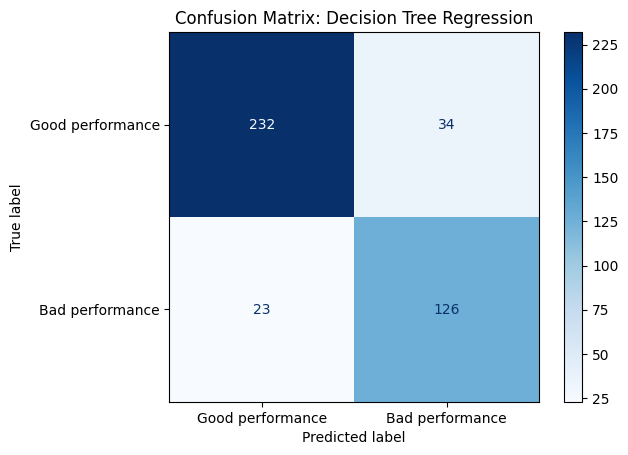

In [218]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:",conf_matrix_dt)
disp = ConfusionMatrixDisplay(conf_matrix_dt,display_labels=['Good performance','Bad performance']) ; 
disp.plot(cmap='Blues') ; 
plt.title(f"Confusion Matrix: Decision Tree Regression") ; 
plt.show(); 

<p style="color:red">K-Nearest Neighbours(KNN)
 </p
     >

Confusion Matrix: [[230  36]
 [ 57  92]]


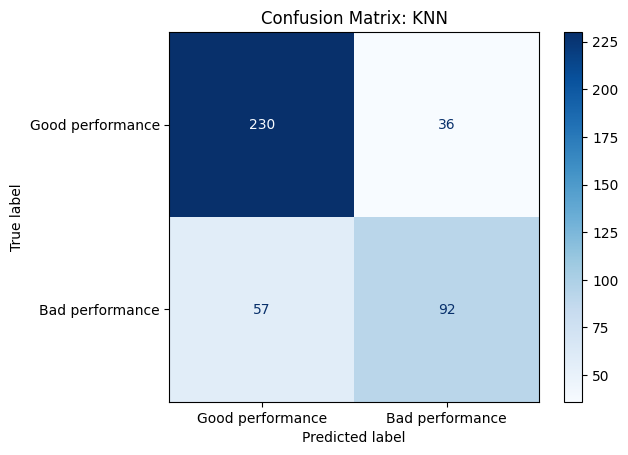

In [219]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:",conf_matrix_knn)
disp = ConfusionMatrixDisplay(conf_matrix_knn,display_labels=['Good performance','Bad performance']) ; 
disp.plot(cmap='Blues') ; 
plt.title(f"Confusion Matrix: KNN") ; 
plt.show(); 

<p style="color:red">Logistic Regression
 </p
     >

Confusion Matrix: [[229  37]
 [ 33 116]]


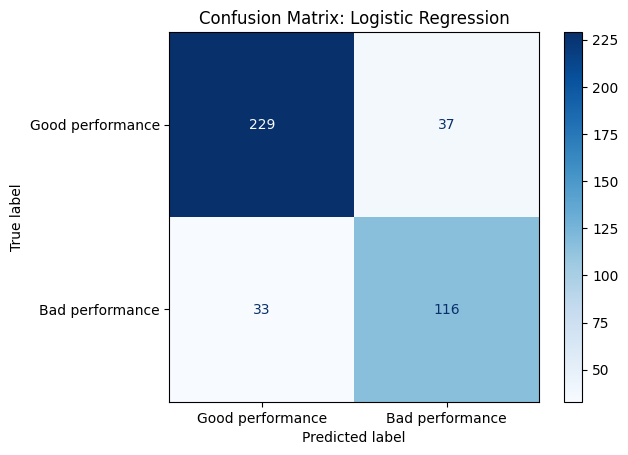

In [222]:
conf_matrix_rg = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",conf_matrix_rg)
disp = ConfusionMatrixDisplay(conf_matrix_rg,display_labels=['Good performance','Bad performance']) ; 
disp.plot(cmap='Blues') ; 
plt.title(f"Confusion Matrix: Logistic Regression") ; 
plt.show(); 

<p style="color:red">Random Forest
 </p
     >

Confusion Matrix: [[242  24]
 [ 20 129]]


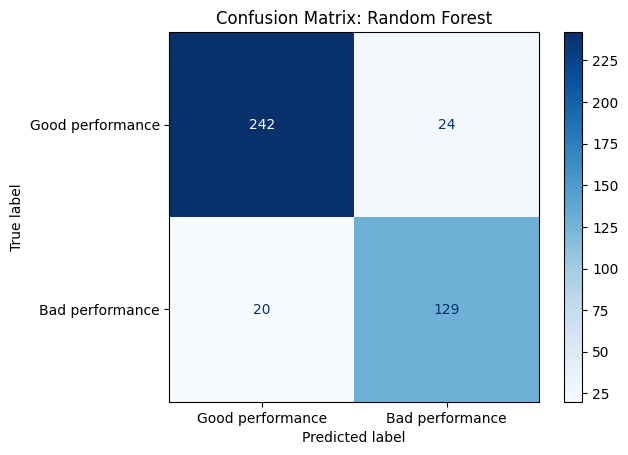

In [221]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:",conf_matrix_rf)
disp = ConfusionMatrixDisplay(conf_matrix_rf,display_labels=['Good performance','Bad performance']) ; 
disp.plot(cmap='Blues') ; 
plt.title(f"Confusion Matrix: Random Forest") ; 
plt.show(); 

<p style="color:red">Support Vector Machine
 </p
     >

Confusion Matrix: [[228  38]
 [ 25 124]]


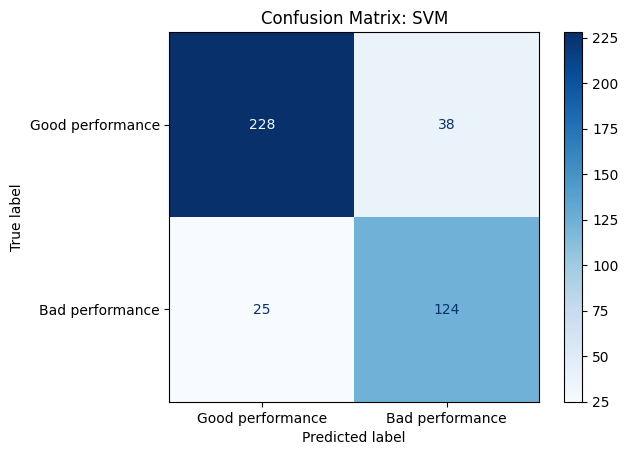

In [220]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:",conf_matrix_svm)
disp = ConfusionMatrixDisplay(conf_matrix_svm,display_labels=['Good performance','Bad performance']) ; 
disp.plot(cmap='Blues') ; 
plt.title(f"Confusion Matrix: SVM") ; 
plt.show(); 